<a href="https://colab.research.google.com/github/Sweta-Das/ML-with-Python/blob/main/2_5_Support_Vector_Machines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Linear Models & Non-linear Features

Linear models can have limiting low-dimensional spaces. They're made more flexible by adding more features.

In [ ]:
!pip install mglearn

Text(0, 0.5, 'Feature 1')

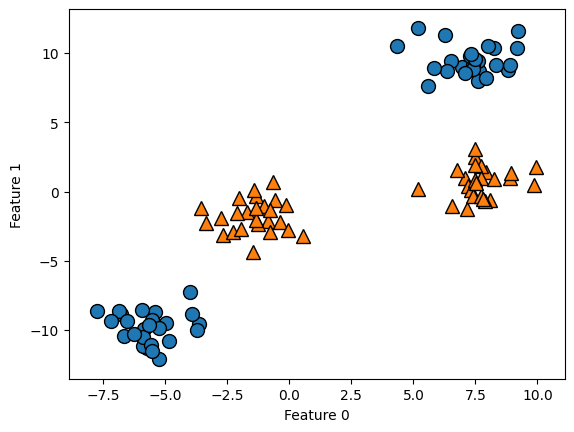

In [2]:
import mglearn
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

X, y = make_blobs(centers = 4, random_state = 8)
y = y % 2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

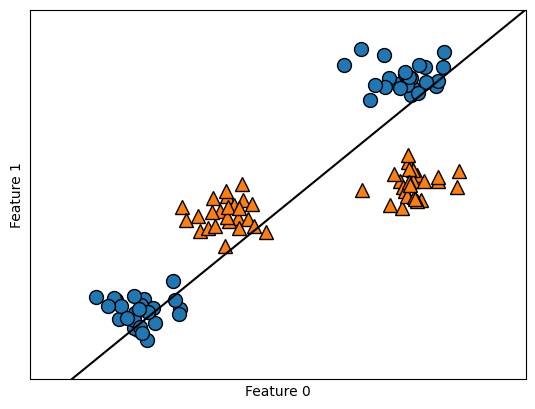

In [3]:
# Linear Classification on the dataset using LinearSVC
from sklearn.svm import LinearSVC
lin_svm = LinearSVC(max_iter = 10000).fit(X, y)

mglearn.plots.plot_2d_separator(lin_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

We can see that a linear model classifier can only separate points using a line, which is not enough.<br/>

This can be improved by adding a new feature in the dataset.

In [7]:
import importlib
importlib.import_module('mpl_toolkits').__path__

_NamespacePath(['/usr/local/lib/python3.10/dist-packages/mpl_toolkits'])

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Adding squared 2nd feature in the dataset
X_new = np.hstack([X, X[:, 1:] ** 2])

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import axes3d
figure = plt.figure()

# Visualizing in 3D
ax = Axes3D(figure, elev = -152, azim = -26)
# print(ax)

# Plotting 1st all the points with y==0, & then all with y == 1
mask = y == 0
ax.scatter3D(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c = 'b',
           cmap = mglearn.cm2, s = 60, edgecolor = 'k')
ax.scatter3D(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c = 'r',
           marker = '^', cmap = mglearn.cm2, s = 60, edgecolor = 'k')

ax.set_xlabel("feature 0")
ax.set_ylabel("feature 1")
ax.set_zlabel("feature1 ** 2")

<ipython-input-13-38cf6e8442de>:17: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter3D(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c = 'b',
<ipython-input-13-38cf6e8442de>:19: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter3D(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c = 'r',


Text(0.5, 0, 'feature1 ** 2')

<Figure size 640x480 with 0 Axes>

In [14]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [16]:
#Showing linear decision boundary
figure = plt.figure()
ax = Axes3D(figure, elev = -152, azim = -26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride= 8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c= 'b',
           cmap = mglearn.cm2, s = 60, edgecolor = 'k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r',
           marker = '^', cmap = mglearn.cm2, s = 60, edgecolor = 'k')

ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

<ipython-input-16-40dfcc40afb0>:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c= 'b',
<ipython-input-16-40dfcc40afb0>:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r',


Text(0.5, 0, 'feature1 ** 2')

<Figure size 640x480 with 0 Axes>

Text(0, 0.5, 'Feature 1')

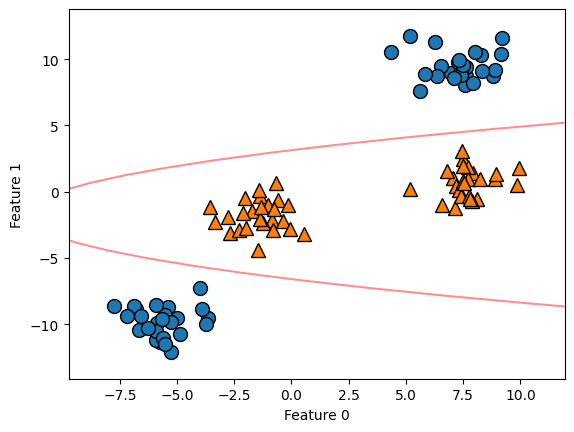

In [17]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contour(XX, YY, dec.reshape(XX.shape), levels= [dec.min(), 0, dec.max()],
            cmap = mglearn.cm2, alpha = 0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

## The Kernel Trick

Adding non-linear features to data representation make linear models more powerful. The kernel trick is one of such trick that allows to learn a classifier in a higher dimensional space without actually computing the new and large representation. It works by directly computing the distance (scalar product) of data points for expanded feature representation, without actually computing the expansion.<br/>
<br/>

2 ways to map data into a higher-dimensional space with SVM:
- Polynomial kernel ▶ computes all possible polynomial up to a certain degree of original features
- Radial Basis Function (RBF) kernel / Gaussian kernel ▶ corresponds to an infinite dimensional feature space. It considers all possible polynomials of all degrees, but the importance of the features decreases for higher degrees.

## Understanding SVMs

Support Vectors ➡ In SVM Classification, to define decision boundary, only a subset of training data points matter, specifically those that lie on the border between classes. These are called support vectors. <br/>
When a new point is introduced, the classification decision is made based on the distances to each of the support vectors. <br/>
<br/>

Distance between data points by Gaussian kernel:

k-rbf(x1, x2) = exp(-γ ||x1 - x2||^2)<br/>

Here,
x1 & x2 = data points<br/>
||x1-x2|| = Euclidean distance<br/>
γ = parameter that controls the width of the Gaussian kernel


Text(0, 0.5, 'Feature 1')

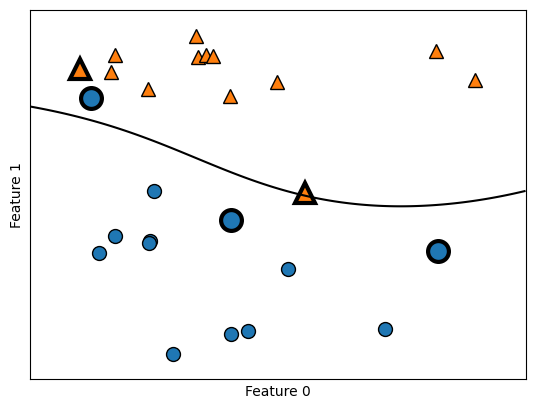

In [18]:
from sklearn.svm import SVC
X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C = 10, gamma = 0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps = 0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

# Plotting support vectors
sv = svm.support_vectors_

# Class labels of support vectors are given by the sign of dual coeff
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s = 15,
                         markeredgewidth = 3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

The given fig. displays the decision boundary and support vectors found by an SVM with RBF kernel. The SVM yields a very smooth and non-linear  boundary.

## Tuning SVM Parameters

Parameters used in prev. code:<br/>
gamma ➡ inverse of the width of the Gaussian kernel. It determines how far the influence of a single training example reaches. (Low value of gamma ▶ far reach; High value of gamma ▶ limited reach). It means wider the radius of the Gaussian kernel, further the influence of each training example.<br/>
C ➡ regularization parameter; limits the importance of each point (dual_coef_)

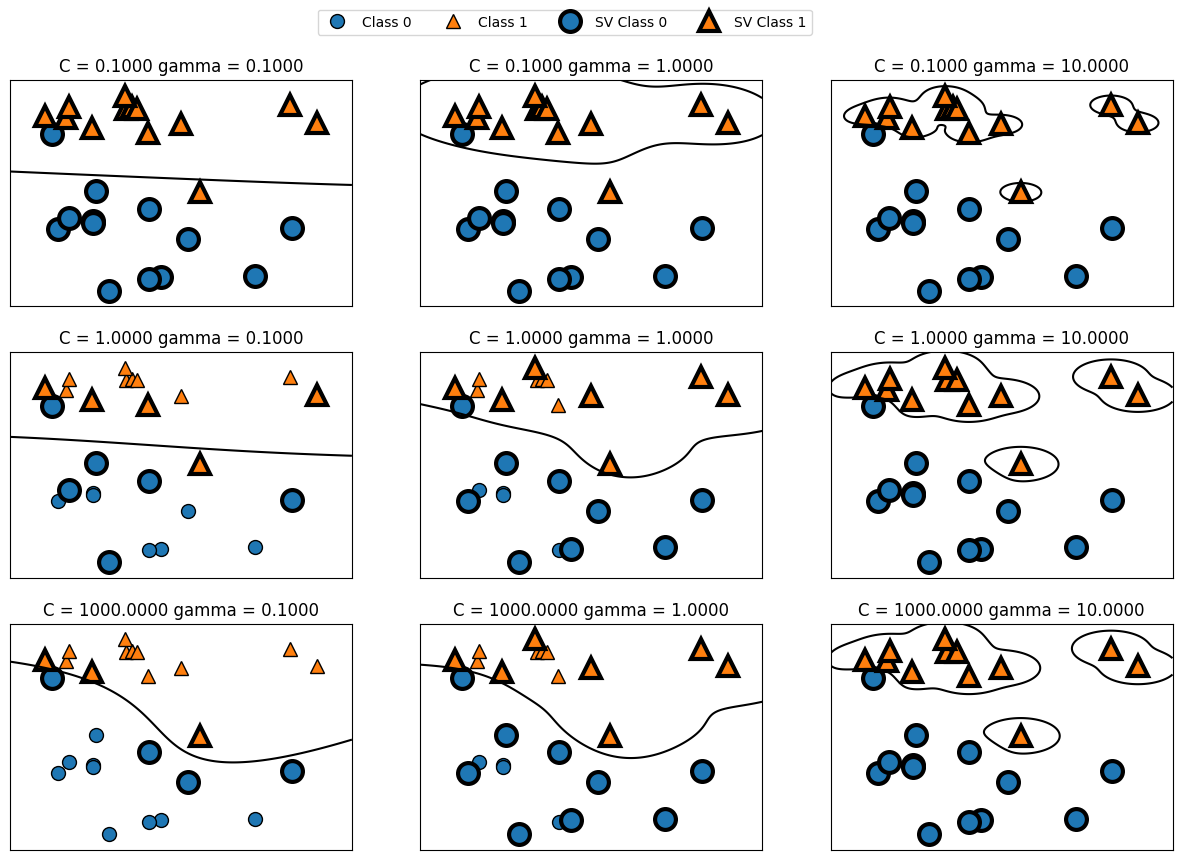

In [19]:
# Varying SVM Parameters
fig, axes = plt.subplots(3, 3, figsize = (15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
  for a, gamma in zip(ax, range(-1, 2)):
    mglearn.plots.plot_svm(log_C = C, log_gamma = gamma, ax = a)

axes[0, 0].legend(["Class 0", "Class 1", "SV Class 0", "SV Class 1"], ncol = 4,
                  loc = (0.9, 1.2))

By default, C = 1 and gamma = 1/n_features

In [26]:
# Applying RBF kernel SVM to the Breast Cancer Dataset
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state = 0)

svc = SVC()
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.90
Accuracy on test set: 0.94


Text(0, 0.5, 'Feature magnitude')

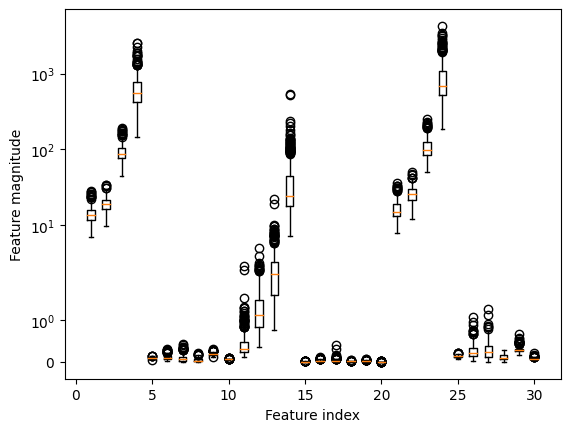

In [27]:
plt.boxplot(X_train, manage_ticks = False)
plt.yscale("symlog")
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")

## Preprocessing Data for SVMs

Resolving by rescaling each feature by making them approx. on the same scale i.e. between 0 and 1.

In [29]:
# Computing the min value per feature on training set
min_on_training = X_train.min(axis=0)

# Computing the range of each feature (max - min) on training set
range_on_training = (X_train - min_on_training).max(axis=0)

# Subtracting the min, and dividing by range
# Afterwards, min = 0 & max = 1 for each feature
X_train_scaled = (X_train - min_on_training) / range_on_training
print("Minimum for each feature\n{}".format(X_train_scaled.min(axis = 0)))
print("Maximum for each feature\n{}".format(X_train_scaled.max(axis = 0)))

Minimum for each feature
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Maximum for each feature
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [30]:
# Using same transformation on test set
X_test_scaled = (X_test - min_on_training) / range_on_training

svc = SVC()
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(svc.score(X_train_scaled,
                                                          y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.984
Accuracy on test set: 0.972


This gives the case of underfitting. Now, we can adjust the parameters for better results.

In [33]:
svc = SVC(C = 10)
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(svc.score(X_train_scaled,
                                                          y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.972


Strengths of SVM:<br/>
- Powerful models and perform well on variety of datasets.
- Allows complex decision boundaryies, even if the data has only a few featues.
- Work well on low-dimensional & high-dimensional data, but don't scale well with no. of samples.
- Work well if all features are in similar units or similar scales.<br/>

Weaknesses of SVM:<br/>
- SVM works well with 10,000 samples but can become challenging in terms of runtime and memory usage in case of 100,000 samples.
- Require careful preprocessing and tuning of parameters.
- Sometimes, SVM models are harder to inspect.